In [80]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
# pd.set_option('display.width', None)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 100)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [81]:
from config import date_str, DOWNLOAD_DIR, DEST_DIR

path_data = '..\data\df_finviz_n_ratios_merged.parquet'
path_corr = '..\data\df_corr_emv_matrix.parquet'
path_cov = '..\data\df_cov_emv_matrix.parquet'
path_output = f'..\picks\{date_str}_portf.txt'

In [82]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [83]:
df_data = pd.read_parquet(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)

df_corr = pd.read_parquet(path_corr)
df_cov = pd.read_parquet(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1538
count_after above threshold (0.75): 1164
Percentage above threshold (0.75): 75.68%

df_cov.shape: (1538, 1538)


Symbol      A     AA    AAL   AAON   AAPL    ABBV    ABEV   ABNB     ABT  \
Symbol                                                                     
A      0.0002 0.0001 0.0002 0.0003 0.0001  0.0000  0.0000 0.0001  0.0000   
AA     0.0001 0.0007 0.0002 0.0004 0.0001 -0.0001  0.0001 0.0002 -0.0001   
AAL    0.0002 0.0002 0.0007 0.0004 0.0002  0.0000  0.0000 0.0004  0.0001   
AAON   0.0003 0.0004 0.0004 0.0012 0.0002 -0.0001 -0.0000 0.0003 -0.0001   
AAPL   0.0001 0.0001 0.0002 0.0002 0.0003 -0.0000  0.0001 0.0002  0.0001   

Symbol   ACGL     ACI   ACIW    ACM    ACN   ACWI   ACWV   ACWX   ADBE  \
Symbol                                                                   
A      0.0001  0.0000 0.0000 0.0001 0.0001 0.0001 0.0000 0.0001 0.0001   
AA     0.0001  0.0000 0.0002 0.0001 0.0001 0.0001 0.0000 0.0001 0.0003   
AAL    0.0002 -0.0000 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001 0.0002   
AAON   0.0000 -0.0000 0.0001 0.0002 0.0002 0.0002 0.0000 0.0002 0.0004   
AAPL   0.0001 -0.0000 0.0002 0.0001 0.0002 0.0001 0.0000 0.0001 0.0002   

Symbol     ADC    ADI     ADM    ADP   ADSK    ADT     AEE    AEG     AEM  \
Symbol                                                                      
A       0.0000 0.0002  0.0000 0.0001 0.0001 0.0001  0.0000 0.0001  0.0001   
AA     -0.0000 0.0002 -0.0001 0.0000 0.0003 0.0002 -0.0000 0.0002  0.0001   
AAL     0.0000 0.0004  0.0000 0.0002 0.0002 0.0003  0.0000 0.0002 -0.0000   
AAON   -0.0000 0.0004 -0.0001 0.0000 0.0003 0.0001 -0.0001 0.0002  0.0002   
AAPL   -0.0000 0.0002  0.0000 0.0001 0.0002 0.0002 -0.0000 0.0001  0.0000   

Symbol     AEP    AER     AES     AFG    AFL   AFRM   AGCO     AGG    AGI  \
Symbol                                                                      
A       0.0000 0.0001  0.0000  0.0000 0.0000 0.0002 0.0001 -0.0000 0.0001   
AA     -0.0001 0.0002  0.0001 -0.0000 0.0001 0.0005 0.0002 -0.0000 0.0002   
AAL    -0.0000 0.0001  0.0001  0.0001 0.0001 0.0006 0.0003 -0.0000 0.0000   
AAON   -0.0001 0.0001  0.0001  0.0000 0.0001 0.0008 0.0002 -0.0000 0.0002   
AAPL   -0.0000 0.0000 -0.0000  0.0000 0.0001 0.0003 0.0002 -0.0000 0.0000   

Symbol   AGNC    AIG    AIT    AIZ     AJG   AKAM   ALAB    ALB     ALC  \
Symbol                                                                    
A      0.0001 0.0001 0.0001 0.0000  0.0000 0.0001 0.0002 0.0001  0.0001   
AA     0.0001 0.0000 0.0003 0.0001 -0.0000 0.0002 0.0005 0.0003 -0.0000   
AAL    0.0001 0.0001 0.0003 0.0001  0.0000 0.0003 0.0003 0.0003  0.0001   
AAON   0.0001 0.0000 0.0004 0.0001 -0.0000 0.0003 0.0010 0.0002  0.0001   
AAPL   0.0001 0.0001 0.0002 0.0001  0.0000 0.0002 0.0002 0.0001  0.0001   

Symbol   ALGN    ALK     ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT  \
Symbol                                                                          
A      0.0002 0.0002  0.0000 0.0001 0.0001 0.0002 0.0001 0.0001 0.0000 0.0001   
AA     0.0003 0.0004  0.0001 0.0000 0.0001 0.0001 0.0002 0.0003 0.0001 0.0002   
AAL    0.0003 0.0005  0.0000 0.0002 0.0002 0.0004 0.0002 0.0004 0.0001 0.0002   
AAON   0.0004 0.0004 -0.0000 0.0001 0.0003 0.0003 0.0003 0.0004 0.0001 0.0004   
AAPL   0.0002 0.0002  0.0000 0.0001 0.0001 0.0002 0.0001 0.0001 0.0000 0.0001   

Symbol   AMCR    AMD    AME    AMGN     AMH   AMLP    AMP     AMT     AMX  \
Symbol                                                                      
A      0.0000 0.0002 0.0001  0.0001  0.0001 0.0000 0.0001  0.0000 -0.0000   
AA     0.0000 0.0004 0.0002 -0.0001  0.0000 0.0001 0.0002 -0.0001  0.0000   
AAL    0.0001 0.0004 0.0002  0.0001  0.0002 0.0001 0.0003 -0.0000  0.0000   
AAON   0.0001 0.0006 0.0003 -0.0001 -0.0000 0.0001 0.0003 -0.0001  0.0001   
AAPL   0.0001 0.0002 0.0001  0.0000  0.0001 0.0000 0.0002  0.0000  0.0000   

Symbol   AMZN     AN   ANET   ANGL   ANSS    AON    AOS    APA    APD    APG  \
Symbol                                                                         
A      0.0001 0.0001 0.0002 0.0000 0.0000 0.0000 0.0001 0.0001 0.0001 0.00


df_corr.shape: (1538, 1538)


Symbol      A     AA    AAL   AAON   AAPL    ABBV    ABEV   ABNB     ABT  \
Symbol                                                                     
A      1.0000 0.4067 0.5930 0.5458 0.4663  0.2327  0.1466 0.2711  0.0821   
AA     0.4067 1.0000 0.3511 0.4220 0.2874 -0.1934  0.3106 0.3848 -0.3698   
AAL    0.5930 0.3511 1.0000 0.4371 0.4617  0.1094  0.1172 0.5980  0.2254   
AAON   0.5458 0.4220 0.4371 1.0000 0.3558 -0.2157 -0.0844 0.4062 -0.1493   
AAPL   0.4663 0.2874 0.4617 0.3558 1.0000 -0.0881  0.2070 0.5029  0.2748   

Symbol   ACGL     ACI   ACIW    ACM    ACN   ACWI   ACWV   ACWX   ADBE  \
Symbol                                                                   
A      0.3444  0.0659 0.0603 0.4527 0.3535 0.6058 0.5485 0.5008 0.3787   
AA     0.2482  0.0258 0.3801 0.3957 0.2465 0.6106 0.2180 0.6053 0.4143   
AAL    0.4383 -0.0175 0.2978 0.5101 0.3810 0.6343 0.5499 0.4290 0.2617   
AAON   0.0890 -0.0299 0.2003 0.4957 0.2957 0.6783 0.2519 0.5976 0.4195   
AAPL   0.3839 -0.0655 0.4904 0.4662 0.4790 0.6833 0.5750 0.4545 0.5470   

Symbol     ADC    ADI     ADM    ADP   ADSK    ADT     AEE    AEG     AEM  \
Symbol                                                                      
A       0.2111 0.6560  0.0369 0.3481 0.3992 0.2652  0.0618 0.5154  0.3484   
AA     -0.2257 0.3710 -0.2451 0.1580 0.6450 0.4101 -0.1199 0.4555  0.2138   
AAL     0.0676 0.6655  0.0137 0.5159 0.4819 0.5279  0.1285 0.3434 -0.0144   
AAON   -0.1668 0.5433 -0.1458 0.1192 0.4991 0.1848 -0.1966 0.3599  0.3563   
AAPL   -0.1085 0.6233  0.1805 0.6074 0.5761 0.5388 -0.1807 0.3301  0.1285   

Symbol     AEP    AER     AES     AFG    AFL   AFRM   AGCO     AGG    AGI  \
Symbol                                                                      
A       0.0520 0.4259  0.1521  0.1376 0.3115 0.2915 0.3512 -0.3443 0.2796   
AA     -0.4073 0.5455  0.1595 -0.1324 0.2966 0.4057 0.2719 -0.3411 0.3633   
AAL    -0.0290 0.3992  0.1341  0.2378 0.4599 0.4861 0.4324 -0.2267 0.0180   
AAON   -0.3007 0.3275  0.1022  0.0587 0.2026 0.4965 0.2265 -0.2949 0.3486   
AAPL   -0.1175 0.1045 -0.1302  0.0408 0.5336 0.3823 0.4520 -0.2686 0.1737   

Symbol   AGNC    AIG    AIT    AIZ     AJG   AKAM   ALAB    ALB     ALC  \
Symbol                                                                    
A      0.5522 0.4023 0.3266 0.2314  0.2199 0.3988 0.2996 0.3398  0.4311   
AA     0.3540 0.1284 0.4973 0.3496 -0.0157 0.3449 0.4701 0.5350 -0.0646   
AAL    0.3649 0.2702 0.5320 0.3222  0.1097 0.4599 0.2303 0.4882  0.2369   
AAON   0.2248 0.0144 0.5667 0.1542 -0.0117 0.3659 0.6266 0.3102  0.1673   
AAPL   0.5098 0.3790 0.5318 0.3298  0.1070 0.4080 0.2677 0.3875  0.3423   

Symbol   ALGN    ALK     ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT  \
Symbol                                                                          
A      0.5846 0.4426  0.0822 0.4195 0.3358 0.4707 0.3730 0.3519 0.0712 0.5017   
AA     0.6744 0.5494  0.2556 0.0477 0.2568 0.1577 0.4546 0.5092 0.2520 0.4862   
AAL    0.5265 0.7563  0.1232 0.5622 0.4610 0.4212 0.4374 0.6232 0.3203 0.4316   
AAON   0.5924 0.4055 -0.0371 0.2731 0.4166 0.2363 0.5154 0.5063 0.3803 0.6723   
AAPL   0.5465 0.4752  0.1187 0.4512 0.2421 0.2963 0.4032 0.4006 0.0638 0.3310   

Symbol   AMCR    AMD    AME    AMGN     AMH   AMLP    AMP     AMT     AMX  \
Symbol                                                                      
A      0.2634 0.4161 0.5983  0.3232  0.3982 0.2378 0.5206  0.0325 -0.0825   
AA     0.0846 0.5664 0.5433 -0.1896  0.0958 0.4069 0.5545 -0.2975  0.0671   
AAL    0.2281 0.5231 0.5825  0.1928  0.5143 0.2930 0.6313 -0.0243  0.0379   
AAON   0.1228 0.6285 0.5642 -0.1314 -0.0577 0.2992 0.4867 -0.2452  0.2424   
AAPL   0.2935 0.3838 0.6724  0.1070  0.2818 0.0717 0.6132  0.1059  0.1911   

Symbol   AMZN     AN   ANET   ANGL   ANSS    AON    AOS    APA    APD    APG  \
Symbol                                                                         
A      0.3556 0.4282 0.3928 0.5089 0.3177 0.2554 0.3622 0.4298 0.4943 0.47


df_data.shape: (1164, 51)


,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3352780.0000,1.2600,48.1000,-10.8700,-0.2948,-0.2500,-6.2300,-12.6800,-2.0200,30.1600,0.8500,-3.0100,-2.6000,-10.7200,7.0900,-14.1900,36.0300,6.0300,2.6800,2.7600,36.3509,52.9700,0.6900,223.1900,0.4800,18.2989,6826.0287,609.1110,1.4770,2.2091,1.2783,4.1245,6.5224,1.8482,1.8923,2.6235,1.3382,-2.8584,-3.3106,0.6255,-1.2647,-1.5925,0.8113,-0.1353,-0.1757,0.9776,1.1038,1.6242,1.2107
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2841190.0000,1.0000,42.2700,-9.3300,-2.1481,-3.2800,-1.6200,-11.2300,-10.7100,-9.1600,-1.3200,-5.3800,-9.4200,-14.7600,4.0700,-18.4000,4.0700,8.7700,2.3000,2.1900,19.0631,23.1100,0.8200,382.1900,1.8100,3.6407,10.7766,1.9601,-3.9490,-5.0418,0.4904,-1.8621,-2.3351,0.7258,-0.2822,-0.3980,0.9549,-2.8813,-3.6239,0.6298,-1.6678,-2.1460,0.7444,-0.7441,-0.9381,0.8733,-0.4838,-0.6183,0.9205
NVDA,NVIDIA Corp,"Technology, Semiconductors",2687660.0000,1.9600,40.6200,-17.9800,-1.1487,-8.7300,-3.4300,-19.6000,-9.2700,21.9100,-3.9500,-11.0800,-13.6100,-26.0600,6.2700,-28.0700,45.6900,5.5900,4.5800,4.2800,216.5404,281.4600,0.7700,110.1500,1.6300,1.6987,4.0031,1.3566,-7.7509,-8.9502,0.3334,-4.4288,-5.1583,0.4690,-1.9094,-2.6139,0.7305,-3.1182,-3.7061,0.6076,-1.4636,-1.7826,0.7782,-0.5416,-0.6891,0.9114,0.5974,0.8330,1.1040
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",2036570.0000,1.3900,38.0800,-12.4100,-4.5640,-6.5800,-6.2700,-14.1100,2.2300,6.5400,-2.7500,-10.7900,-4.0300,-20.7600,4.2100,-20.7600,26.7500,6.4900,3.3000,3.0800,41.1368,40.0500,1.0300,192.1700,1.0000,-1.4980,-2.6433,0.7645,-7.7274,-7.9657,0.1941,-1.3112,-1.7608,0.7947,-1.8366,-2.4080,0.7470,-4.4799,-5.1255,0.5067,-2.2968,-2.8299,0.6969,0.3740,0.5264,1.0619,0.1882,0.2593,1.0316
GOOG,Alphabet Inc,"Communication Services, Internet Content & Inf...",1925920.0000,1.0400,37.1600,-16.5700,-3.1692,-8.0500,-5.8000,-18.1200,-3.8800,4.3500,-4.6300,-11.8000,-9.8900,-23.8700,4.3800,-23.8700,7.2100,5.0300,3.4100,2.8700,20.0797,19.9700,1.0100,158.8800,1.7000,12.5412,6826.0287,609.1110,-6.9694,-7.5390,0.2627,-3.2130,-3.7726,0.5884,-3.0074,-3.5808,0.6301,-4.2430,-4.7905,0.5258,-2.4769,-2.9247,0.6679,-0.2412,-0.3267,0.9609,0.0792,0.1096,1.0137


,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000
mean,62251.0481,1.0238,47.7198,-0.0435,-1.0031,-2.0787,-1.9756,-0.8186,-0.3294,9.4037,-0.5907,-3.1050,-0.7275,-12.5527,9.1824,-18.0004,31.0523,2.9769,2.5843,2.7559,5.7753,6.0457,0.9545,102.5425,0.2799,88.8532,2538.0970,227.1409,-2.6034,94.2495,12.9889,-1.4102,1.3379,1.3069,1.2032,3.7648,1.5173,-1.1219,-0.9186,0.9282,0.1115,0.5403,1.0780,-0.0068,0.1429,1.0198,0.3448,0.5826,1.0762
std,204562.2137,0.5887,10.4879,15.1530,3.3155,4.9667,7.9281,15.3779,20.0226,41.6294,4.2147,8.0130,13.7207,11.1643,8.4098,14.5943,52.0338,4.0478,1.5746,1.5310,13.8072,13.4547,0.4247,116.1911,1.5539,1288.2734,3279.7169,292.1576,9.8894,528.1317,66.5076,4.8985,28.4766,5.1252,3.5709,10.5248,1.6097,2.7626,4.0125,0.4679,1.8969,3.1641,0.4478,1.1194,1.6790,0.2121,0.8450,1.2909,0.1676
min,3150.0000,-0.7300,18.9000,-62.9100,-18.1243,-23.4700,-38.8400,-67.6900,-60.0300,-83.8700,-27.3900,-38.4900,-56.7300,-67.7800,-4.9700,-95.1100,-4.9700,0.0200,0.0100,0.0100,0.4044,0.7505,0.3200,2.2500,-19.5100,-2139.8542,-15.8743,0.0000,-74.2236,-15.6090,0.0000,-20.3139,-12.9306,0.0241,-9.1985,-8.5574,0.1524,-7.4956,-7.7801,0.2221,-5.3350,-5.6481,0.3828,-3.7176,-4.0896,0.5106,-2.1544,-2.7003,0.6324
25%,9335.0000,0.6600,40.1300,-8.9800,-2.2926,-4.5150,-5.9525,-9.7625,-10.7175,-8.8650,-2.4800,-7.3925,-7.9825,-18.1200,3.4675,-26.2800,8.5150,0.7100,1.6900,1.8900,1.2664,1.4700,0.7300,35.4275,-0.2825,-2.8835,-4.5883,0.5912,-8.2793,-8.5823,0.2202,-4.2408,-5.1838,0.4808,-1.2366,-1.7081,0.8205,-3.3684,-4.0511,0.5759,-1.4079,-1.7799,0.7890,-0.7020,-0.9154,0.8823,-0.2060,-0.2879,0.9658
50%,19000.0000,0.9900,45.9700,-0.1150,-0.8848,-1.6050,-1.8650,-0.6050,-2.2850,4.0050,-0.3300,-2.2900,-0.7300,-10.2900,6.7550,-15.1500,19.0900,1.7200,2.3300,2.5200,2.2940,2.5700,0.8700,66.0850,0.2600,6.2891,28.6050,3.5483,-3.9109,-4.9505,0.5010,-1.5576,-2.1853,0.7660,0.9209,1.4638,1.1611,-1.4278,-1.8640,0.7916,-0.0955,-0.1317,0.9838,-0.1222,-0.1658,0.9782,0.3665,0.5187,1.0642
75%,48802.5000,1.2525,55.3350,8.7425,0.7010,0.6625,1.9825,8.0550,8.4400,20.2225,1.5825,1.9225,6.5675,-3.7275,12.7700,-6.0425,36.9550,3.7000,3.2225,3.4400,4.9102,5.3625,1.0500,121.0975,0.8900,17.8381,6826.0287,609.1110,2.8825,6.4530,1.6680,1.5870,2.7286,1.3063,3.2162,5.9274,1.7004,0.9799,1.5176,1.1805,1.5218,2.4120,1.2950,0.7624,1.1514,1.1420,0.8921,1.3233,1.1692
max,3352780.0000,4.5000,89.8900,83.9200,62.1912,57.6300,55.6300,83.2500,129.8600,653.4500,50.2300,44.8900,89.4400,2.1000,75.2700,2.1000,1009.1400,37.4200,14.5400,13.6900,216.5404,281.4600,5.9600,954.4000,7.8200,31182.9513,6826.0287,609.1110,45.3975,3321.2276,419.4353,27.5578,832.5179,158.3311,20.4318,192.2775,35.4545,6.1103,22.9542,3.5422,5.9076,40.5413,9.7053,3.2888,10.0818,2.5828,2.9148,5.4899,1.8149


In [84]:
# Check df_corr
has_nan_corr = df_corr.isnull().any().any()
print(f"Are there any NaNs in df_corr? {has_nan_corr}")

# Check df_cov
has_nan_cov = df_cov.isnull().any().any()
print(f"Are there any NaNs in df_cov? {has_nan_cov}")

Are there any NaNs in df_corr? False
Are there any NaNs in df_cov? False


In [85]:
df_data.columns

Index(['Company', 'Info', 'MktCap AUM, M', 'Beta', 'RSI', 'Perf YTD %',
       'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %',
       'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %',
       '50D High %', '50D Low %', '52W High %', '52W Low %', 'ATR',
       'Volatility W %', 'Volatility M %', 'Volume, M', 'Avg Volume, M',
       'Rel Volume', 'Price', 'Change %', 'Sharpe 3d', 'Sortino 3d',
       'Omega 3d', 'Sharpe 5d', 'Sortino 5d', 'Omega 5d', 'Sharpe 10d',
       'Sortino 10d', 'Omega 10d', 'Sharpe 15d', 'Sortino 15d', 'Omega 15d',
       'Sharpe 30d', 'Sortino 30d', 'Omega 30d', 'Sharpe 60d', 'Sortino 60d',
       'Omega 60d', 'Sharpe 120d', 'Sortino 120d', 'Omega 120d', 'Sharpe 250d',
       'Sortino 250d', 'Omega 250d'],
      dtype='object')

In [86]:
import logging

output_log = 'output.log'
logging.basicConfig(filename=output_log, level=logging.DEBUG, encoding='utf-8')


In [87]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def portfolio_optimizer_60days(df_data, df_corr, df_cov, num_clusters=60, num_tickers=100, output_file="portfolio_output.txt"):
    """
    Selects the top N tickers based on a composite score and optimizes a portfolio using cluster analysis.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix.
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix.
        num_clusters (int): The number of clusters to form.
        num_tickers (int): The number of top tickers to select.
        output_file (str): The name of the log file.

    Returns:
        tuple: (pd.DataFrame with intermediate values, pd.DataFrame with cluster statistics, 
                pd.DataFrame with detailed cluster information)

    Complete fixed portfolio optimizer with:
    - Momentum decay weights
    - RSI penalty
    - Proper DataFrame handling
    """
    # Configure logging to write to both console and file
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(output_file, mode='w'),
            logging.StreamHandler()
        ]
    )

    try:
        logging.info("Starting optimized portfolio selection")

        # ===== STAGE 1: DATA PREPARATION =====
        # Convert numeric columns
        numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price']
        for col in numeric_cols:
            if col in df_data.columns:
                df_data[col] = pd.to_numeric(
                    df_data[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce'
                )

        # ===== SCORING CONFIGURATION =====
        time_horizons = [3, 5, 10, 15, 30, 60]
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,  # Reduced from 0.25
            'sma': 0.15,
            'volatility': -0.10,
            'rsi': -0.05  # New RSI penalty
        }

        # Column definitions
        sharpe_cols = [f'Sharpe {days}d' for days in time_horizons]
        sortino_cols = [f'Sortino {days}d' for days in time_horizons]
        omega_cols = [f'Omega {days}d' for days in time_horizons]
        momentum_cols = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
        sma_cols = ['SMA20 %', 'SMA50 %', 'SMA200 %']
        volatility_cols = ['Volatility W %', 'Volatility M %']
        momentum_weights = np.array([0.4, 0.3, 0.2, 0.1])  # Decay weights

        # Data cleaning
        required_cols = (sharpe_cols + sortino_cols + omega_cols +
                        momentum_cols + sma_cols + volatility_cols + ['RSI'])
        clean_mask = df_data[required_cols].notna().all(axis=1)
        df_clean = df_data.loc[clean_mask].copy()

        if len(df_clean) < num_tickers:
            raise ValueError(f"Only {len(df_clean)} valid tickers after cleaning")

        # ===== SCORE CALCULATION =====
        def calculate_weighted_score(df):
            components = {}
            intermediate_values = {}
            raw_values = {}

            # Risk-adjusted metrics
            for category, cols in [('sharpe', sharpe_cols),
                                 ('sortino', sortino_cols),
                                 ('omega', omega_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            # Momentum with decay weights
            momentum_zscores = df[momentum_cols].apply(lambda x: (x - x.mean()) / x.std())
            intermediate_values['momentum_zscores'] = momentum_zscores
            raw_values['momentum_raw'] = df[momentum_cols]
            components['momentum'] = (momentum_zscores @ momentum_weights) * feature_weights['momentum']

            # RSI penalty
            if 'RSI' in df.columns:
                rsi_penalty = pd.Series(
                    np.where(df['RSI'] > 70, feature_weights['rsi'], 0),
                    index=df.index
                )
                components['rsi'] = rsi_penalty
            else:
                components['rsi'] = pd.Series(0, index=df.index)

            # Technical indicators
            for category, cols in [('sma', sma_cols),
                                 ('volatility', volatility_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            composite_score = pd.concat(components, axis=1).sum(axis=1)
            return composite_score, intermediate_values, raw_values

        # Calculate scores
        df_clean['composite_score'], intermediates, raw_vals = calculate_weighted_score(df_clean)

        # ===== STAGE 2: CLUSTERING =====
        # top_n = df_clean.nlargest(num_tickers, 'composite_score')
        # top_n_tickers = top_n.index.tolist()
        # corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]
        # distance_matrix = 1 - np.abs(corr_subset)
        # np.fill_diagonal(distance_matrix.values, 0)
        # linkage_matrix = linkage(squareform(distance_matrix), method='ward')
        # clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

        # ===== STAGE 2: CLUSTERING =====
        top_n = df_clean.nlargest(num_tickers, 'composite_score')
        top_n_tickers = top_n.index.tolist()
        corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]

        # Ensure the correlation matrix is symmetric
        corr_subset = (corr_subset + corr_subset.T) / 2  # Force symmetry

        distance_matrix = 1 - np.abs(corr_subset)
        np.fill_diagonal(distance_matrix.values, 0)

        # Convert to condensed distance matrix and verify symmetry
        condensed_dist = squareform(distance_matrix)
        if not np.allclose(condensed_dist, condensed_dist.T, rtol=1e-05, atol=1e-08):
            condensed_dist = (condensed_dist + condensed_dist.T) / 2  # Force symmetry

        linkage_matrix = linkage(condensed_dist, method='ward')
        clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')








        # ===== STAGE 3: PORTFOLIO SELECTION =====
        cluster_df = pd.DataFrame({
            'ticker': top_n_tickers,
            'cluster': clusters,
            'score': top_n['composite_score']
        }).merge(
            df_clean[['Price', 'MktCap AUM, M', 'Volatility M %']],
            left_on='ticker',
            right_index=True
        )

        epsilon = 1e-6
        cluster_df = cluster_df.assign(
            variance=cluster_df['ticker'].apply(lambda x: df_cov.loc[x, x]),
            risk_adj_score=lambda x: x['score'] / (np.sqrt(x['variance']) + epsilon),
            volatility=lambda x: np.sqrt(x['variance'])
        )

        # Prepare outputs
        detailed_clusters_df = cluster_df.sort_values(['cluster', 'risk_adj_score'], 
                                                    ascending=[True, False])
        detailed_clusters_df = detailed_clusters_df[['cluster', 'ticker', 'score', 
                                                  'risk_adj_score', 'volatility']]
        detailed_clusters_df.columns = ['Cluster_ID', 'Ticker', 'Raw_Score', 
                                     'Risk_Adj_Score', 'Volatility']
        
        cluster_stats_df = cluster_df.groupby('cluster').agg(
            Size=('ticker', 'count'),
            Avg_Correlation=('ticker', lambda x: corr_subset.loc[x,x].values.mean()),
            Avg_Raw_Score=('score', 'mean'),
            Avg_Risk_Adj_Score=('risk_adj_score', 'mean'),
            Avg_Volatility=('volatility', 'mean')
        ).reset_index().round(2)
        cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_Correlation', 
                                  'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']

        # ===== FIXED ZSCORE_DF CONSTRUCTION =====
        # Convert intermediates to DataFrame
        intermediates_df = pd.DataFrame()
        for key, values in intermediates.items():
            if isinstance(values, pd.DataFrame):
                intermediates_df = pd.concat([intermediates_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                intermediates_df[key] = pd.Series(values, index=df_clean.index)

        # Convert raw values to DataFrame
        raw_vals_df = pd.DataFrame()
        for key, values in raw_vals.items():
            if isinstance(values, pd.DataFrame):
                raw_vals_df = pd.concat([raw_vals_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                raw_vals_df[key] = pd.Series(values, index=df_clean.index)

        # Construct final output
        zscore_df = pd.concat([
            intermediates_df,
            raw_vals_df,
            df_clean['composite_score'].rename('composite_score'),
            cluster_df.set_index('ticker')['cluster'].reindex(df_clean.index)
        ], axis=1)

        # Write results to file
        with open(output_file, 'a') as f:
            f.write("\n\n=== CLUSTER STATISTICS ===\n")
            cluster_stats_df.to_string(f, index=False)
            f.write("\n\n=== DETAILED CLUSTERS ===\n")
            detailed_clusters_df.to_string(f, index=False)
            f.write("\n\n=== SCORING DETAILS (1-20) ===\n")
            zscore_df.head(20).to_string(f)  # Only write top 20 rows for brevity

        logging.info("Portfolio optimization completed successfully")
        return zscore_df, cluster_stats_df, detailed_clusters_df

    except Exception as e:
        logging.error(f"Optimization failed: {str(e)}", exc_info=True)
        raise



In [88]:
print("\n🔧 Running portfolio optimizer...")

zscore_df, cluster_stats_df, detailed_clusters_df = portfolio_optimizer_60days(
    df_data, 
    df_corr,
    df_cov,
    num_clusters=60,
    num_tickers=len(df_data),
    output_file=path_output,
)

print(f"\n✅ Execution completed.\nSee output save to: {path_output}\nOutput log: {output_log}")



🔧 Running portfolio optimizer...

✅ Execution completed.
See output save to: ..\picks\2025-04-01_portf.txt
Output log: output.log


In [89]:
logging.shutdown()

In [90]:
import pandas as pd
import numpy as np

def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df, 
                               num_clusters=3, stocks_per_cluster=5,
                               min_cluster_size=5, volatility_threshold=0.3):
    """
    Pipeline to select stocks from better performing clusters
    
    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics
    - detailed_clusters_df: DataFrame with detailed cluster information
    - num_clusters: Number of top clusters to select
    - stocks_per_cluster: Number of stocks to select from each cluster
    - min_cluster_size: Minimum size for a cluster to be considered
    - volatility_threshold: Maximum allowed volatility for selected stocks
    
    Returns:
    - selected_stocks: DataFrame of selected stocks with their metrics
    - cluster_performance: DataFrame of selected clusters with their metrics
    """
    
    # ===== 1. Filter and Rank Clusters =====
    # Filter clusters by minimum size
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    
    # Calculate composite cluster score (weighted average of raw score and correlation)
    qualified_clusters['Composite_Cluster_Score'] = (
        0.7 * qualified_clusters['Avg_Raw_Score'] +  # Using Raw Score for selection
        0.3 * (1 - qualified_clusters['Avg_Correlation'])  # Prefer less correlated clusters
    )

    # Sort clusters by composite score
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    
    # Select top N clusters
    selected_clusters = ranked_clusters.head(num_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()
    
    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    
    for cluster_id in cluster_ids:
        # Get stocks from this cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
        
        # Filter by volatility threshold
        cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]
        
        if len(cluster_stocks) > 0:
            # Sort by risk-adjusted score and select top stocks
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(stocks_per_cluster)
            
            # Add cluster metrics to each stock
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_Correlation', 'Avg_Volatility', 
                       'Avg_Raw_Score', 'Avg_Risk_Adj_Score']:
                top_stocks[f'Cluster_{col}'] = cluster_metrics[col]
            
            selected_stocks_list.append(top_stocks)
    
    # Combine all selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        
        # Calculate position sizing weights (based on risk-adjusted scores)
        selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] / 
                                   selected_stocks['Risk_Adj_Score'].sum())
        
        # Sort by cluster then by score
        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                   ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria")
    
    # ===== 3. Prepare Enhanced Output Reports =====
    # Cluster performance report - now showing both score types
    cluster_performance = selected_clusters.copy()
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)
    
    # Add diversification metrics
    if not selected_stocks.empty:
        cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_Correlation']
    
    return selected_stocks, cluster_performance


In [91]:
# Run the selection pipeline
selected_stocks, cluster_performance = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    num_clusters=3,
    stocks_per_cluster=3,
    min_cluster_size=5,
    volatility_threshold=0.3
)

# Enhanced Output Display
print("\n=== CLUSTER SELECTION CRITERIA ===")
print("* Using Avg_Raw_Score for cluster selection")
print("* Using Risk_Adj_Score for stock selection within clusters")
print(f"* Selected top {len(cluster_performance)} clusters from {len(cluster_stats_df)} total")

print("\n=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===")
display_cols = ['Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 
                'Avg_Correlation', 'Avg_Volatility', 'Composite_Cluster_Score',
                'Stocks_Selected', 'Intra_Cluster_Diversification']
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

# NEW: Print top 8 stocks by Raw_Score for each selected cluster
print("\n=== TOP STOCKS BY RAW SCORE PER CLUSTER ===")
for cluster_id in cluster_performance['Cluster_ID']:
    cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
    top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']]
    
    print(f"\nCluster {cluster_id} - Top 8 by Raw Score:")
    print(top_raw.to_string(index=False))
    print(f"Cluster Avg Raw Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Raw_Score'].values[0]:.2f}")
    print(f"Cluster Avg Risk Adj Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Risk_Adj_Score'].values[0]:.2f}")

print("\n=== FINAL SELECTED STOCKS (BY RISK-ADJ SCORE) ===")
print("* Stocks actually selected based on Risk_Adj_Score within each cluster")
print("* Position weights assigned based on Risk_Adj_Score")

available_cols = [col for col in ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 
                                'Volatility', 'Weight', 'Cluster_Avg_Raw_Score',
                                'Cluster_Avg_Risk_Adj_Score'] 
                  if col in selected_stocks.columns]

print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                ascending=[True, False]).to_string(index=False))

# Calculate and print portfolio summary
if not selected_stocks.empty:
    print("\n=== PORTFOLIO SUMMARY ===")
    print(f"Total Stocks Selected: {len(selected_stocks)}")
    print(f"Average Raw Score: {selected_stocks['Raw_Score'].mean():.2f}")
    print(f"Average Risk-Adjusted Score: {selected_stocks['Risk_Adj_Score'].mean():.2f}")
    print(f"Average Volatility: {selected_stocks['Volatility'].mean():.2f}")
    print("\nCluster Distribution:")
    print(selected_stocks['Cluster_ID'].value_counts().to_string())


=== CLUSTER SELECTION CRITERIA ===
* Using Avg_Raw_Score for cluster selection
* Using Risk_Adj_Score for stock selection within clusters
* Selected top 3 clusters from 60 total

=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_Correlation  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         44     8         1.7000            147.4200           0.7600          0.0100                   1.2620                3                         0.2400
         58     6         0.8800             99.3600           0.5500          0.0100                   0.7510                3                         0.4500
         30    15         0.8800             94.2400           0.7100          0.0100                   0.7030                3                         0.2900

=== TOP STOCKS BY RAW SCORE PER CLUSTER ===

Cluster 44 - Top 8 by Raw Score:
Ticker  Raw_Score  Risk_Adj_Score  Volatility
   HMY     

In [92]:
selected_stocks

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Cluster_Composite_Cluster_Score,Cluster_Avg_Correlation,Cluster_Avg_Volatility,Cluster_Avg_Raw_Score,Cluster_Avg_Risk_Adj_Score,Weight
Ticker,,,,,,,,,,,
EPD,30,EPD,1.1419,155.7929,0.0073,0.7030,0.7100,0.0100,0.8800,94.2400,0.1016
OGE,30,OGE,1.2503,145.2587,0.0086,0.7030,0.7100,0.0100,0.8800,94.2400,0.0947
ATO,30,ATO,1.2751,136.5256,0.0093,0.7030,0.7100,0.0100,0.8800,94.2400,0.0890
PHYS,44,PHYS,1.7135,260.7380,0.0066,1.2620,0.7600,0.0100,1.7000,147.4200,0.1700
IAU,44,IAU,1.1713,158.9502,0.0074,1.2620,0.7600,0.0100,1.7000,147.4200,0.1037
GLDM,44,GLDM,1.1591,158.8563,0.0073,1.2620,0.7600,0.0100,1.7000,147.4200,0.1036
COR,58,COR,1.9879,239.1906,0.0083,0.7510,0.5500,0.0100,0.8800,99.3600,0.1560
MCK,58,MCK,1.5664,199.1720,0.0079,0.7510,0.5500,0.0100,0.8800,99.3600,0.1299
BECN,58,BECN,0.9203,78.9075,0.0117,0.7510,0.5500,0.0100,0.8800,99.3600,0.0515


In [93]:
# Step 1: Drop Tickers 
drop_tickers = ['BECN']
selected_stocks = selected_stocks[~selected_stocks['Ticker'].isin(drop_tickers)].copy()

# Step 1: Drop Cluster 
drop_cluster = 0
selected_stocks = selected_stocks[selected_stocks['Cluster_ID'] != drop_cluster].copy()

# Step 2: Recalculate weights based on remaining stocks' Risk_Adj_Scores
selected_stocks['Weight'] = selected_stocks['Risk_Adj_Score'] / selected_stocks['Risk_Adj_Score'].sum()

# Step 3: Display the updated portfolio
print(f"\n=== UPDATED PORTFOLIO (CLUSTER {drop_cluster}, TICKER {drop_tickers} REMOVED) ===")
# sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
#               .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False])
# Select columns, sort, and then set 'Ticker' as the index
sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
              .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False]) \
              .set_index('Ticker')



print(sorted_selected_stocks_df.to_string(index=True))

# Step 4: Extract the 'Ticker' column from the sorted DataFrame
ticker_order = sorted_selected_stocks_df.index.tolist()


# Optional: Print weight redistribution summary
original_total = 1.0
new_total = selected_stocks['Weight'].sum()
print(f"\nWeights redistributed from Cluster {drop_cluster} & Ticker {drop_tickers}: {original_total - new_total:.1%}")
print(f"New total weights sum to: {new_total:.0%}")


=== UPDATED PORTFOLIO (CLUSTER 0, TICKER ['BECN'] REMOVED) ===
        Cluster_ID  Raw_Score  Risk_Adj_Score  Weight  Volatility
Ticker                                                           
PHYS            44     1.7135        260.7380  0.1793      0.0066
COR             58     1.9879        239.1906  0.1645      0.0083
MCK             58     1.5664        199.1720  0.1369      0.0079
IAU             44     1.1713        158.9502  0.1093      0.0074
GLDM            44     1.1591        158.8563  0.1092      0.0073
EPD             30     1.1419        155.7929  0.1071      0.0073
OGE             30     1.2503        145.2587  0.0999      0.0086
ATO             30     1.2751        136.5256  0.0939      0.0093

Weights redistributed from Cluster 0 & Ticker ['BECN']: 0.0%
New total weights sum to: 100%


In [94]:
sorted_selected_stocks_df

,Cluster_ID,Raw_Score,Risk_Adj_Score,Weight,Volatility
Ticker,,,,,
PHYS,44,1.7135,260.7380,0.1793,0.0066
COR,58,1.9879,239.1906,0.1645,0.0083
MCK,58,1.5664,199.1720,0.1369,0.0079
IAU,44,1.1713,158.9502,0.1093,0.0074
GLDM,44,1.1591,158.8563,0.1092,0.0073
EPD,30,1.1419,155.7929,0.1071,0.0073
OGE,30,1.2503,145.2587,0.0999,0.0086
ATO,30,1.2751,136.5256,0.0939,0.0093


In [95]:
_df = sorted_selected_stocks_df[['Weight', 'Cluster_ID']]
_df

,Weight,Cluster_ID
Ticker,,
PHYS,0.1793,44
COR,0.1645,58
MCK,0.1369,58
IAU,0.1093,44
GLDM,0.1092,44
EPD,0.1071,30
OGE,0.0999,30
ATO,0.0939,30


In [96]:
final_selected_stocks = pd.concat([_df, df_data.loc[ticker_order]], axis=1)
final_selected_stocks

,Weight,Cluster_ID,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PHYS,0.1793,44,Sprott Physical Gold Trust,"Financial, Asset Management",10540.0000,0.1500,74.3400,19.8600,2.2448,3.2500,7.8200,19.9200,17.4100,39.5400,3.8500,6.9900,17.7600,-0.1200,15.7800,-0.1200,39.0800,0.2500,0.7200,0.7900,6.5771,3.8900,1.6900,24.1400,0.3300,21.7549,6826.0287,609.1110,34.1967,3321.2276,419.4353,5.2413,11.0080,2.2081,9.9315,22.6670,4.1026,4.1304,6.4883,1.8345,5.7977,9.6757,2.3486,2.1604,2.9281,1.4081,1.7908,2.4894,1.3319
COR,0.1645,58,Cencora Inc,"Healthcare, Medical Distribution",53790.0000,0.5400,76.1100,23.4700,1.2556,3.3300,8.6300,22.2400,23.3400,14.1700,4.9100,8.6900,15.9800,-1.1700,16.7000,-1.1700,29.1700,4.7200,1.4100,1.9400,1.3223,1.6000,0.8300,277.4100,-0.2400,6.6968,33.2011,3.9578,14.3824,65.2823,9.2248,14.1745,70.7351,10.6644,20.4318,118.0471,21.1158,6.0359,11.2332,2.6552,4.4609,7.5861,2.0556,2.5064,4.3833,1.5464,0.5888,0.8639,1.1080
MCK,0.1369,58,Mckesson Corporation,"Healthcare, Medical Distribution",84430.0000,0.4900,70.9200,18.2100,1.2048,1.5200,4.5200,16.8300,37.9800,25.4900,2.4700,7.4900,16.3300,-0.7300,18.0900,-0.7300,45.0600,12.5500,1.5200,2.1200,0.6300,0.8279,0.7600,673.6900,0.1000,14.3463,6826.0287,609.1110,23.4233,3321.2276,419.4353,5.4203,8.8632,2.4015,11.6312,25.4828,6.0255,5.2689,12.1677,2.6724,3.3942,5.8652,1.7360,2.6140,5.9159,1.6879,0.8507,1.1600,1.1940
IAU,0.1093,44,iShares Gold Trust,"Financial, Exchange Traded Fund, Commodities &...",42540.0000,0.1700,74.3700,18.8900,2.0458,3.2800,7.8600,19.2200,17.5100,40.1100,3.9600,7.0300,17.7300,-0.2400,15.5100,-0.2400,39.6600,0.6000,0.7900,0.7700,13.2561,6.5900,2.0100,58.8600,-0.1700,8.6183,74.2250,7.6125,17.9119,141.6500,18.8462,4.9051,11.6226,2.2351,8.9228,25.6434,4.3987,3.7630,6.5178,1.8329,5.3709,9.6738,2.3169,2.2488,3.1871,1.4349,1.8096,2.6134,1.3391
GLDM,0.1092,44,SPDR Gold MiniShares Trust,"Financial, Exchange Traded Fund, Commodities &...",13230.0000,0.1700,74.5300,18.8500,2.0310,3.2800,7.8900,19.2600,17.5600,40.2700,3.9400,7.0200,17.7700,-0.2600,15.5200,-0.2600,39.8300,0.6200,0.7900,0.7700,8.6626,3.0100,2.8800,61.7900,-0.1600,8.6887,76.9092,7.8516,18.0443,146.0396,19.3993,4.9015,11.6517,2.2428,8.9572,26.1255,4.4756,3.8050,6.5954,1.8489,5.0915,8.8773,2.2339,2.2208,3.1472,1.4290,1.8089,2.6102,1.3391
EPD,0.1071,30,Enterprise Products Partners L P,"Energy, Oil & Gas Midstream",74110.0000,0.7600,59.8400,9.1200,0.7953,2.1500,1.4500,10.1400,17.2700,17.2700,1.7300,2.2200,10.6900,-0.9000,8.6000,-1.1800,25.0300,0.5600,1.5300,1.7300,4.1586,4.7000,0.8800,34.2200,0.2300,72.9365,6826.0287,609.1110,45.3975,3321.2276,419.4353,1.6300,2.5598,1.2832,5.6156,13.1935,2.5699,0.7714,1.2714,1.1259,2.2438,3.7946,1.4300,2.3769,3.8280,1.4732,1.2286,1.9024,1.2303
OGE,0.0999,30,Oge Energy Corp,"Utilities, Utilities - Regulated Electric",9290.0000,0.5600,64.6300,11.8300,2.3746,4.0400,-0.4100,11.6900,12.9500,34.4900,2.8900,4.5500,12.5900,-0.8700,11.1300,-0.8700,42.5100,0.7900,1.4600,1.7800,1.2406,1.2100,1.0200,46.1300,0.3700,23.2067,6826.0287,609.1110,34.1955,3321.2276,419.4353,3.8140,5.6369,1.8198,5.0559,8.4039,2.2320,2.2497,3.4458,1.4570,2.5108,3.7746,1.5123,1.6705,2.4623,1.3288,1.8588,2.7495,1.3809
ATO,0.0939,30,Atmos Energy Corp,"Utilities, Utilities - Regulated Gas",24590.0000,0.6800,64.8900,11.2500,2.6501,4.4500,0.8500,11.1800,12.4500,30.3400,3.3300,5.1100,12.6100,-0.2100,11.6500,-0.2100,39.6200,2.5800,1.3800,1.7900,0.7708,0.9108,0.8500,154.9400,0.2

In [97]:
output_filename_tsv = f"..\picks\{date_str}_selected_stocks.tsv"

final_selected_stocks.to_csv(output_filename_tsv, sep='\t', encoding='utf-8', index=True)

In [98]:
final_selected_stocks.to_parquet(f'..\picks\{date_str}_selected_stocks.parquet')
cluster_stats_df.to_parquet(f'..\picks\{date_str}_cluster_stats_df.parquet')
detailed_clusters_df.to_parquet(f'..\picks\{date_str}_detailed_clusters_df.parquet')

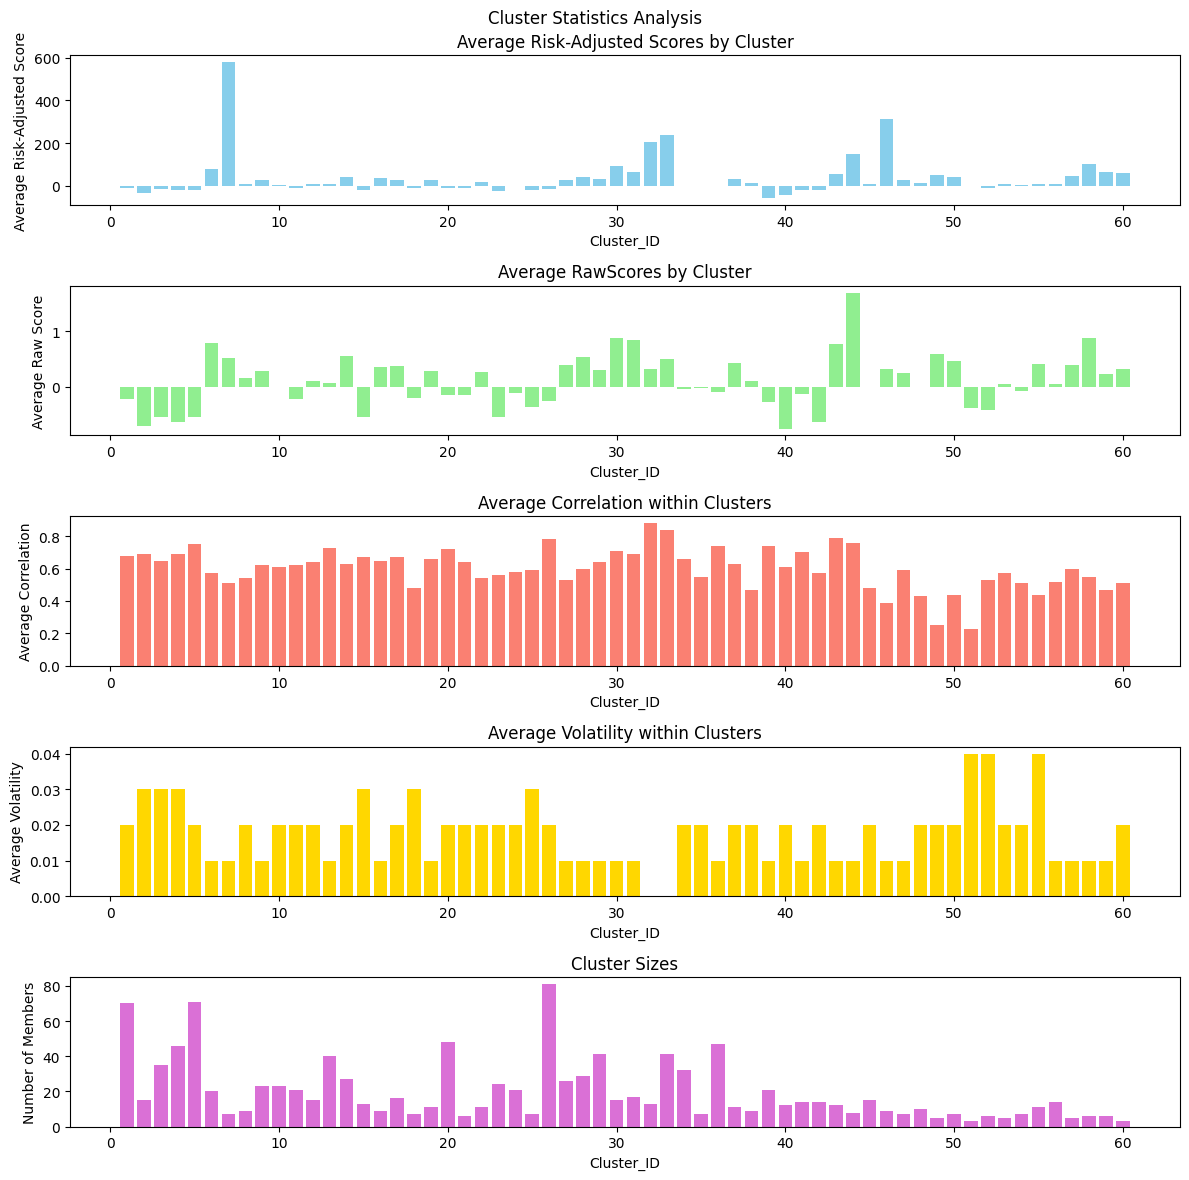

In [99]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
                     'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Plot 1 Average Risk-Adjusted Score
ax1.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], color='skyblue')
# ax1.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], color='lightgreen')
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
# ax2.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], color='lightgreen')
ax2.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], color='lightgreen')
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
ax3.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Correlation'], color='salmon')
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
ax4.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], color='gold')
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
ax5.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], color='orchid')
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [100]:
# Calculate summary statistics for cluster_stats_df
stats_summary = pd.DataFrame({
    'Count': cluster_stats_df.count(numeric_only=True),
    'Sum': cluster_stats_df.sum(numeric_only=True),
    'Mean': cluster_stats_df.mean(numeric_only=True),
    'Std': cluster_stats_df.std(numeric_only=True),
    'Mean+1Std (68%)': cluster_stats_df.mean(numeric_only=True) + cluster_stats_df.std(numeric_only=True),
    'Mean-1Std (68%)': cluster_stats_df.mean(numeric_only=True) - cluster_stats_df.std(numeric_only=True),
    'Mean+2Std (95%)': cluster_stats_df.mean(numeric_only=True) + 2*cluster_stats_df.std(numeric_only=True),
    'Mean-2Std (95%)': cluster_stats_df.mean(numeric_only=True) - 2*cluster_stats_df.std(numeric_only=True),
    'Min': cluster_stats_df.min(numeric_only=True),
    'Max': cluster_stats_df.max(numeric_only=True),
})

print("Summary Statistics for Cluster Data:")
display(stats_summary.round(4))

Summary Statistics for Cluster Data:


,Count,Sum,Mean,Std,Mean+1Std (68%),Mean-1Std (68%),Mean+2Std (95%),Mean-2Std (95%),Min,Max
Cluster_ID,60,1830.0000,30.5000,17.4642,47.9642,13.0358,65.4285,-4.4285,1.0000,60.0000
Size,60,1164.0000,19.4000,17.2589,36.6589,2.1411,53.9179,-15.1179,3.0000,81.0000
Avg_Correlation,60,36.0900,0.6015,0.1241,0.7256,0.4774,0.8498,0.3532,0.2300,0.8800
Avg_Raw_Score,60,6.5500,0.1092,0.4689,0.5780,-0.3597,1.0469,-0.8286,-0.7500,1.7000
Avg_Risk_Adj_Score,60,2168.0000,36.1333,95.9052,132.0386,-59.7719,227.9438,-155.6771,-58.5900,579.2700
Avg_Volatility,60,1.0600,0.0177,0.0087,0.0264,0.0090,0.0351,0.0003,0.0000,0.0400


In [101]:
# Sort by Avg_Raw_Score in descending order
sorted_by_Avg_Raw_Score = cluster_stats_df.sort_values('Avg_Raw_Score', ascending=False)
print(f'sorted_by_Avg_Raw_Score')
display(sorted_by_Avg_Raw_Score.head(10))

sorted_by_Avg_Raw_Score


,Cluster_ID,Size,Avg_Correlation,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility
43,44,8,0.7600,1.7000,147.4200,0.0100
29,30,15,0.7100,0.8800,94.2400,0.0100
57,58,6,0.5500,0.8800,99.3600,0.0100
30,31,17,0.6900,0.8400,65.3000,0.0100
5,6,20,0.5700,0.8000,78.6400,0.0100
42,43,12,0.7900,0.7700,53.5500,0.0100
48,49,5,0.2500,0.6000,48.8600,0.0200
13,14,27,0.6300,0.5500,42.2200,0.0200
27,28,29,0.6000,0.5400,40.8000,0.0100
6,7,7,0.5100,0.5200,579.2700,0.0100
